<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт" data-toc-modified-id="Импорт-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Глобальные-переменные" data-toc-modified-id="Глобальные-переменные-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Глобальные переменные</a></span></li><li><span><a href="#Важные-функции" data-toc-modified-id="Важные-функции-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Важные функции</a></span></li></ul></li><li><span><a href="#Загрузка-и-просмотр-данных" data-toc-modified-id="Загрузка-и-просмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и просмотр данных</a></span><ul class="toc-item"><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ресемплирование</a></span></li></ul></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сезонность</a></span><ul class="toc-item"><li><span><a href="#Создание-дополнительных-признаков" data-toc-modified-id="Создание-дополнительных-признаков-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Создание дополнительных признаков</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Работа-с-моделями" data-toc-modified-id="Работа-с-моделями-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Работа с моделями</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт

#### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#### Глобальные переменные

In [2]:
RANDOM_STATE = 12345

#### Важные функции

Создание дополнительных признаков:

    data              - таблица
    main_column       - основной столбец, в котором хранятся данные
    max_lag           - количество отстающих значений
    rolling_mean_size - размер выборки для создания скользящего среднего

In [3]:
def make_features(data, meain_column, max_lag, rolling_mean_size, calendar = ['year', 'month', 'day', 'dayofweek', 'hour']):
    data = data.copy()
    #создаю вариативность календарных признаков, чтобы функция была гибче к изменениям
    if 'year' in calendar:
        data['year'] = data.index.year
    if 'month' in calendar:
        data['month'] = data.index.month
    if 'day' in calendar:
        data['day'] = data.index.day
    if 'dayofweek' in calendar:
        data['dayofweek'] = data.index.dayofweek
    if 'hour' in calendar:
        data['hour'] = data.index.hour
    
    #отстающие значения
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[meain_column].shift(lag)
    
    #скользящее значение
    data['rolling_mean'] =  data[meain_column].shift().rolling(rolling_mean_size).mean()
    
    
    return data

### Загрузка и просмотр данных

In [4]:
try:
    data = pd.read_csv(r"C:\Users\Dmitri\Downloads\taxi.csv", index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [5]:
if not data.index.is_monotonic:
    data.sort_index(inplace=True)

In [6]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div style="border:solid #81d8e6 2px; padding: 10px">
Мы проанализировали данные:
    
    - это временной ряд в период с 1 марта 2018 г. по 31 августа 2018 года. 
    - интервал 10 минут
    
Также мы сразу проверили сортировку данных, задали столбец с датой как индекс и изменили тип данных на Datetime. 
    
Интервал в 10 минут - это слишком мало, нужно провести ресемплирование. Также стоит создать дополнительные признаки для упрощения машинного обучения.
</div>

#### Ресемплирование

<div style="border:solid #81d8e6 2px; padding: 10px">
Интервал в один час поможет отследить изменения в течение дня, поэтому он оптимален. Также мы используем суммирование, поскольку речь идёт о количестве заказов.
</div>

In [8]:
data = data.resample('1H').sum()

<div style="border:solid #81d8e6 2px; padding: 10px">
    Взяли отстающее значение за последний день, а также скользящее среднее за 4 часа. Календарные признаки взяли все.
</div>

## Анализ

In [9]:
decomposed_day = seasonal_decompose(data.resample('1D').sum())

### Тренд

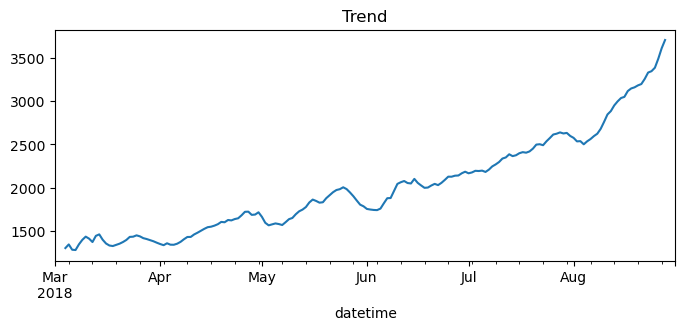

In [10]:
plt.figure(figsize=(8, 3))
decomposed_day.trend.plot(ax=plt.gca(), title='Trend')
plt.show()

<div style="border:solid #81d8e6 2px; padding: 10px">
Можем заметить, что число заказов такси растёт.
</div>

### Сезонность

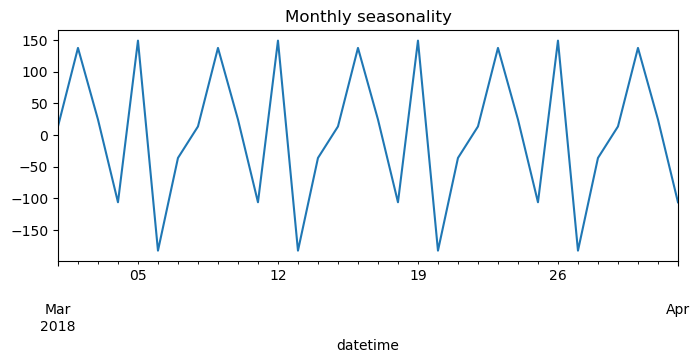

In [11]:
plt.figure(figsize=(8, 3))
decomposed_day.seasonal['2018-03-01':'2018-04-01'].plot(ax=plt.gca(), title='Monthly seasonality')
plt.show()

<div style="border:solid #81d8e6 2px; padding: 10px">
Можем заметить, что есть интервалы, схожие друг с другом, поэтому просмотрим более мелкую сезонность.
</div>

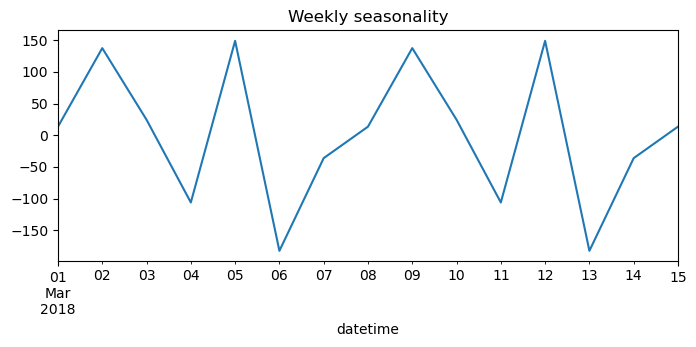

In [12]:
plt.figure(figsize=(8, 3))
decomposed_day.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca(), title='Weekly seasonality')
plt.show()

<div style="border:solid #81d8e6 2px; padding: 10px">
Можно заметить пики в начале и конце рабочей недели. Посмотрим ещё более мелкую сезонность: в течение дня
</div>

In [13]:
decomposed_hour = seasonal_decompose(data)

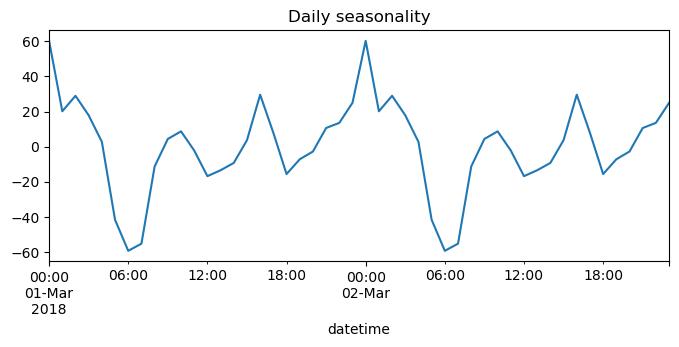

In [14]:
plt.figure(figsize=(8, 3))
decomposed_hour.seasonal['2018-03-01':'2018-03-2'].plot(title='Daily seasonality')
plt.show()

<div style="border:solid #81d8e6 2px; padding: 10px">
Можно заметить пики ночью около полуночи, в середине дня (около 10 и около 17). В 6 часов утра идёт проседание количества заказов.
</div>

#### Создание дополнительных признаков

In [15]:
data_new = make_features(data, 'num_orders', 24, 4, calendar = [ 'day', 'dayofweek', 'hour'])
data_new.dropna(inplace=True)
data_new.head()

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,2,4,0,58.0,113.0,66.0,61.0,45.0,73.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,74.50
2018-03-02 01:00:00,120,2,4,1,90.0,58.0,113.0,66.0,61.0,45.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,81.75
2018-03-02 02:00:00,75,2,4,2,120.0,90.0,58.0,113.0,66.0,61.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,95.25
2018-03-02 03:00:00,64,2,4,3,75.0,120.0,90.0,58.0,113.0,66.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,85.75
2018-03-02 04:00:00,20,2,4,4,64.0,75.0,120.0,90.0,58.0,113.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,87.25


## Обучение

### Подготовка данных к обучению

In [16]:
data_new.head()

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,2,4,0,58.0,113.0,66.0,61.0,45.0,73.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,74.50
2018-03-02 01:00:00,120,2,4,1,90.0,58.0,113.0,66.0,61.0,45.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,81.75
2018-03-02 02:00:00,75,2,4,2,120.0,90.0,58.0,113.0,66.0,61.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,95.25
2018-03-02 03:00:00,64,2,4,3,75.0,120.0,90.0,58.0,113.0,66.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,85.75
2018-03-02 04:00:00,20,2,4,4,64.0,75.0,120.0,90.0,58.0,113.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,87.25


In [17]:
features = data_new.drop('num_orders', axis=1)
target = data_new['num_orders']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, shuffle=False)


print(f"Количество строк в features_train: {features_train.shape[0]/data_new.shape[0]:1.2} выборки")
print(f"Количество строк в features_valid: {features_test.shape[0]/data_new.shape[0]:1.2} выборки")

Количество строк в features_train: 0.9 выборки
Количество строк в features_valid: 0.1 выборки


In [18]:
features.head()

,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,2,4,0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,74.50
2018-03-02 01:00:00,2,4,1,90.0,58.0,113.0,66.0,61.0,45.0,73.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,81.75
2018-03-02 02:00:00,2,4,2,120.0,90.0,58.0,113.0,66.0,61.0,45.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,95.25
2018-03-02 03:00:00,2,4,3,75.0,120.0,90.0,58.0,113.0,66.0,61.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,85.75
2018-03-02 04:00:00,2,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,87.25


In [19]:
target.head()

datetime
2018-03-02 00:00:00     90
2018-03-02 01:00:00    120
2018-03-02 02:00:00     75
2018-03-02 03:00:00     64
2018-03-02 04:00:00     20
Freq: H, Name: num_orders, dtype: int64

### Работа с моделями

In [20]:
tscv = TimeSeriesSplit(n_splits=4)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None)

In [21]:
def fit_model(estimator, param_grid, X_train, y_train):
    model = GridSearchCV(estimator=estimator, 
                            param_grid=param_grid, 
                            n_jobs=-1, 
                            cv=tscv,
                            scoring='neg_root_mean_squared_error')

    model.fit(X_train, y_train)

    best_index = model.best_index_
    best_rmse = round(model.cv_results_['mean_test_score'][best_index], 1)

    print(f"Best RMSE: {abs(best_rmse)}")
    print(f"Best params: {model.best_params_}")

    return model.best_estimator_

#### Случайный лес

In [22]:
%%time
rf_param_grid = {
    'n_estimators': list(range(50, 121, 10)),
    "max_depth": list(range(5, 12, 2)),
}

rf_best_model = fit_model(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=rf_param_grid,
    X_train=features_train,
    y_train=target_train
)

Best RMSE: 26.2
Best params: {'max_depth': 11, 'n_estimators': 120}
Wall time: 14.9 s


#### LGBMRegressor

In [23]:
%%time
lgbm_param_grid = {
    "n_estimators": range(100, 201, 15), 
    "max_depth": range(4, 11, 2),
    'learning_rate': [0.01, 0.05, 0.1]
}

lgbm_best_model = fit_model(
    estimator=LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=lgbm_param_grid,
    X_train=features_train,
    y_train=target_train
)

Best RMSE: 25.4
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 160}
Wall time: 5.99 s


#### CatBoost

In [24]:
%%time
catboost_param_grid = {
    "iterations": range(150, 301, 50),
    "learning_rate": [0.05, 0.1, 0.15],
    "depth": range(2, 12, 3)
}

catboost_best_model = fit_model(
    estimator=CatBoostRegressor(random_state=RANDOM_STATE, verbose=False),
    param_grid=catboost_param_grid,
    X_train=features_train,
    y_train=target_train
)

Best RMSE: 25.0
Best params: {'depth': 5, 'iterations': 300, 'learning_rate': 0.1}
Wall time: 5min 14s


<div style="border:solid #81d8e6 2px; padding: 10px">
Лучшей моделью стала CatBoost
</div>

## Тестирование

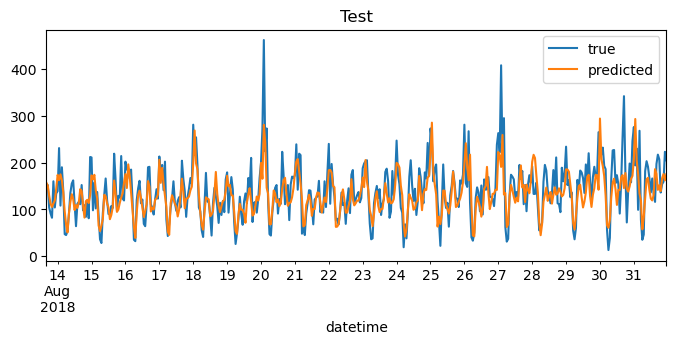

In [27]:
pred = pd.Series(pred, index=target_test.index)

plt.figure(figsize=(8, 3))
target_test.plot(label='true', title='Test')
pred.plot(label='predicted')
plt.legend()
plt.show()

### Проверка на адекватность

In [29]:
random_prediction = [target.mean() for i in range(len(features_test))]
rmse = mean_squared_error(target_test, random_prediction) ** 0.5
print(f"RMSE на тестовой: {rmse:.1f}")

RMSE на тестовой: 80.4


<div style="border:solid #81d8e6 2px; padding: 10px">
Модель показала качественные параметры (меньше 48) и прошла проверку на декватность.
</div>

## Вывод

<div style="border:solid #81d8e6 2px; padding: 10px">
Мы проанализировали данные заказов такси в аэропорте:
    
    - был выявлен тренд на повышение чилса заказов
    - была выявлена сезонность в течение недели: заказов больше в начале и конце будней
    - была выявлена сезонность в течение дня: три пика (00, 10, 17 часов) и один провал (6 часов).

Мы создали дополнительные параметры:
    
    - календарные 
    - смещённое значение
    - скользящее среднее

Мы обучили три модели:
    
    - RandomForest
    - LGBM
    - CatBoost

Наилучшей моделью стала: CatBoost
    
    - depth: 8,
    - iterations: 300, 
    - learning_rate: 0.1
    
</div>


<div class="alert alert-block alert-info">
<b> Исследование </b> 
    
Я возьму модель LGBMRegressor, потому что она быстро обучается. 
    
На ней сравню, что будет, если добавить день или удалить из признаков, а также все признаки. 
Сравнивать буду по метрике RMSE.
</div>

<div class="alert alert-block alert-info">С удалением дня:</div>

In [30]:
data_test = make_features(data, 'num_orders', 24, 4, calendar = ['dayofweek', 'hour'])
data_test.dropna(inplace=True)
data_test.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,4,0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,74.50
2018-03-02 01:00:00,120,4,1,90.0,58.0,113.0,66.0,61.0,45.0,73.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,81.75
2018-03-02 02:00:00,75,4,2,120.0,90.0,58.0,113.0,66.0,61.0,45.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,95.25
2018-03-02 03:00:00,64,4,3,75.0,120.0,90.0,58.0,113.0,66.0,61.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,85.75
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,87.25


In [31]:
features_t = data_test.drop('num_orders', axis=1)
target_t = data_test['num_orders']

features_train_t, features_test_t, target_train_t, target_test_t = train_test_split(
    features_t, target_t, test_size=0.1, shuffle=False)


print(f"Количество строк в features_train: {features_train_t.shape[0]/data_test.shape[0]:1.2} выборки")
print(f"Количество строк в features_valid: {features_test_t.shape[0]/data_test.shape[0]:1.2} выборки")

Количество строк в features_train: 0.9 выборки
Количество строк в features_valid: 0.1 выборки


In [32]:
%%time
lgbm_param_grid = {
    "n_estimators": range(100, 201, 15), 
    "max_depth": range(4, 11, 2),
    'learning_rate': [0.01, 0.05, 0.1]
}

lgbm_best_model = fit_model(
    estimator=LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid=lgbm_param_grid,
    X_train=features_train_t,
    y_train=target_train_t
)

Best RMSE: 25.4
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 160}
Wall time: 10.3 s


In [33]:
pred = lgbm_best_model.predict(features_test_t)

rmse = mean_squared_error(target_test_t, pred) ** 0.5
print(f"RMSE на тестовой: {rmse:.1f}")

RMSE на тестовой: 40.5


<div class="alert alert-block alert-info">RMSE на тестовой с удалением дня: 25.4/40.5</div>

<div class="alert alert-block alert-info"> Без удаления дня: 25.0/41.5 </div>

<div class="alert alert-block alert-info"> Без удаления других признаков:</div>

In [39]:
data_test_2 = make_features(data, 'num_orders', 24, 4)
data_test_2.dropna(inplace=True)
data_test_2.head()

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,2018,3,2,4,0,58.0,113.0,66.0,61.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,74.50
2018-03-02 01:00:00,120,2018,3,2,4,1,90.0,58.0,113.0,66.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,81.75
2018-03-02 02:00:00,75,2018,3,2,4,2,120.0,90.0,58.0,113.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,95.25
2018-03-02 03:00:00,64,2018,3,2,4,3,75.0,120.0,90.0,58.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,85.75
2018-03-02 04:00:00,20,2018,3,2,4,4,64.0,75.0,120.0,90.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,87.25


In [60]:
features_t_2 = data_test_2.drop('num_orders', axis=1)
target_t_2 = data_test_2['num_orders']

features_train_t_2, features_test_t_2, target_train_t_2, target_test_t_2 = train_test_split(
    features_t_2, target_t_2, test_size=0.4, shuffle=False)


print(f"Количество строк в features_train: {features_train_t_2.shape[0]/data_test_2.shape[0]:1.2} выборки")
print(f"Количество строк в features_valid: {features_test_t_2.shape[0]/data_test_2.shape[0]:1.2} выборки")

Количество строк в features_train: 0.6 выборки
Количество строк в features_valid: 0.4 выборки


In [61]:
%%time
lgbm_param_grid = {
    "n_estimators": range(100, 201, 15), 
    "max_depth": range(4, 11, 2),
    'learning_rate': [0.01, 0.05, 0.1]
}

lgbm_best_model = fit_model(
    estimator=LGBMRegressor(random_state=RANDOM_STATE+1, n_jobs=-1),
    param_grid=lgbm_param_grid,
    X_train=features_train_t,
    y_train=target_train_t
)

Best RMSE: 25.4
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 160}
Wall time: 4.35 s


In [63]:
pred = lgbm_best_model.predict(features_test_t_2)

rmse = mean_squared_error(target_test_t_2, pred) ** 0.5
print(f"RMSE на тестовой: {rmse:.1f}")

ValueError: Number of features of the model must match the input. Model n_features_ is 27 and input n_features is 30 

<div class="alert alert-block alert-info"> Без удаления дня: 25.4/ошибка </div>

<div class="alert alert-block alert-info"> От добавления/удаления параметра дня особо сильно не зависит качество модели. 
</div>